#Dia 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#importar datasets
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [ ]:
avaliacoes = avaliacoes[['userId', 'movieId', 'rating']]
avaliacoes.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


##Desafio1
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [ ]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
media_dos_filmes = avaliacoes.groupby('movieId').mean()
media_dos_filmes = media_dos_filmes.drop(columns=['userId'])
media_dos_filmes.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [ ]:
filmes_sem_nota = filmes[~filmes.movieId.isin(media_dos_filmes.index)]
filmes_sem_nota.head()

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War


In [ ]:
len(filmes_sem_nota)

18

##Desafio 2 do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [ ]:
#join
filmes_com_media = filmes.join(media_dos_filmes, on='movieId')
filmes_com_media.columns = ['filmeId', 'titulo', 'genero', 'nota_média']
filmes_com_media.head()

,filmeId,titulo,genero,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


##Desafio 3 do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [ ]:
contagem = avaliacoes.groupby('movieId').count()
contagem = contagem['rating']
filmes_com_contagem = filmes_com_media.join(contagem, on='filmeId')
filmes_com_contagem = filmes_com_contagem.rename({'rating':'Quantidade_votos'}, axis=1)
filmes_com_contagem.head(15)

,filmeId,titulo,genero,nota_média,Quantidade_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0
8,9,Sudden Death (1995),Action,3.125000,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0


##Desafio 4 do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [ ]:
filmes_com_contagem['nota_média'] = filmes_com_contagem['nota_média'].round(2)
filmes_com_contagem['Quantidade_votos'] = filmes_com_contagem['Quantidade_votos'].round(decimals=0).astype(object)
filmes_com_contagem.head()

,filmeId,titulo,genero,nota_média,Quantidade_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


In [ ]:
#filmes_com_contagem.isnull().sum()
filmes_com_contagem.query('filmeId == 2939')

,filmeId,titulo,genero,nota_média,Quantidade_votos
2211,2939,Niagara (1953),Drama|Thriller,NaN,NaN


##Desafio 5 do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [ ]:
genero = list(filmes_com_contagem['genero'].unique())
genero_unico = []
for x in genero:
  if "|" not in x:
    genero_unico.append(x)

print(genero_unico)

['Comedy', 'Action', 'Drama', 'Documentary', 'Thriller', 'Horror', 'Western', 'Children', 'Romance', 'Musical', 'Adventure', 'Crime', 'Film-Noir', 'Sci-Fi', 'War', 'Mystery', 'Fantasy', 'Animation', '(no genres listed)']


In [ ]:
len(genero_unico)

19

##Desafio 6 da Thais André

Contar o número de aparições de cada genero.

In [ ]:
generos_split = filmes.genres.str.get_dummies('|').sum().sort_values(ascending=False)
generos_split

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

##Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

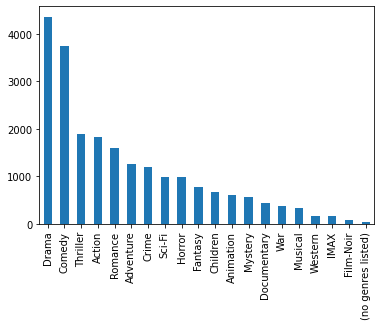

In [ ]:
generos_split.plot(kind='bar')

#Dia 2

##Desafio 1 do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

In [1]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genres"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
chart = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 16))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

NameError: ignored

##Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [2]:
def plot_filmes(n):
  notas_do_filme = avaliacoes.query(f"movieId=={n}")["rating"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

In [3]:
#593, 356, 1136, 7361, 4011 nota 4.16
plot_filmes(593)

NameError: ignored

In [ ]:
plot_filmes(4011)

In [ ]:
plot_filmes(1136)

##Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [ ]:
mais_votados_10 = filmes_com_contagem.sort_values(by=['Quantidade_votos'], ascending=False).filmeId[0:10].to_list()
mais_votados_10_titulos = filmes_com_contagem.sort_values(by=['Quantidade_votos'],ascending=False).titulo[0:10].to_list()

In [ ]:
ax = sns.boxplot(data = avaliacoes.query('movieId in @mais_votados_10'), x ="movieId", y="rating")
ax.set_xticklabels(mais_votados_10_titulos, rotation=45, horizontalalignment='right')
plt.show()


##Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [ ]:
boxplot_tick = filmes.query("movieId in [1,2,919,46578]").title.to_list()
boxplot_tick

In [ ]:
ax = sns.boxplot(data = avaliacoes.query("movieId in [1,2,919,46578]"), x ="movieId", y="rating")
ax.set_xticklabels(boxplot_tick, rotation=45, horizontalalignment='right')
plt.show()

##Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [ ]:
#filmes_com_contagem.query('nota_média<1').sort_values(by=['Quantidade_votos'], ascending=False)
#filme 0.5 id = 8387 
#filme 3 id = 586
#ilme 5 id = 1178	

In [ ]:
avaliacoes.query('movieId==8387').rating.mode().values

##Desafio 6 da Thais André
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [ ]:
matrix_movie = avaliacoes.query('movieId == 2571').rating
f, axes = plt.subplots(1, 2, figsize = (18,6))
matrix_movie.plot(kind='hist', ax=axes[0])
matrix_movie.plot(kind='box', ax=axes[1])
f.suptitle('Matrix, O Filme', fontsize=20)
axes[0].set_title('Histograma Notas')
axes[1].set_title('Boxplot Notas')

##Desafio 7 do Thiago Gonçalves
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [ ]:
filmes_com_data = filmes_com_contagem.copy()
filmes_com_data['data'] = filmes_com_contagem.titulo.str.extract("\((\d{4})\)")


In [ ]:
filmes_com_data.groupby('data').mean().nota_média.plot()

#Dia 3

In [ ]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


##Desafio 1 do Thiago Gonçalves

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

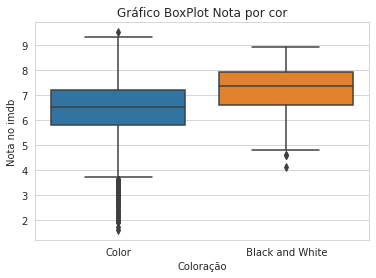

In [ ]:
#limpando duplicados e NaN
black_color = imdb.drop_duplicates(subset='movie_title')[['color', 'imdb_score']].copy()
black_color = black_color.dropna()
#plot
ax = sns.boxplot(data=black_color, x='color', y='imdb_score')
ax.set_xlabel('Coloração')
ax.set_ylabel('Nota no imdb')
ax.set_title('Gráfico BoxPlot Nota por cor')
plt.show()

##Desafio 2 do Guilherme Silveira

No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [ ]:
imdb['profit'] = imdb['gross'] - imdb['budget']
imdb_usa = imdb.query("country == 'USA'")

In [ ]:
imdb_usa.sort_values(by='profit').head(1).movie_title
#sns.scatterplot(x='budget', y='profit', data= imdb_usa)

5    John Carter 
Name: movie_title, dtype: object

##Desafio 3 do Guilherme Silveira

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

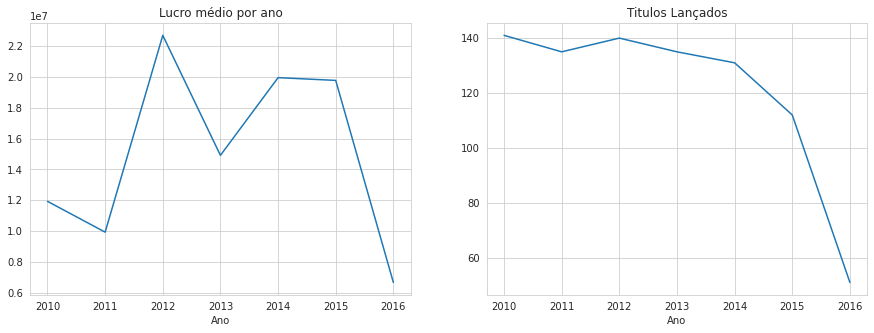

Observando os graficos, podemos perceber que a quantidade de filmes de 2016
está muito abaixo dos anos anteriores, provavelmente o dataset foi fechado
no inicio do ano de 2016, o que influencia no lucro médio dos filmes de 2016
e na quantidade de titulos lançados


In [ ]:
usa_profit_by_year = imdb_usa.query('title_year >= 2010').groupby('title_year').mean().profit
usa_count_by_year = imdb_usa.query('title_year >= 2010').groupby('title_year').count().profit
f, axes = plt.subplots(1,2, figsize=(15,5))
usa_profit_by_year.plot(ax=axes[0])
axes[0].set_title('Lucro médio por ano')
axes[0].set_xlabel('Ano')

usa_count_by_year.plot(ax=axes[1])
axes[1].set_title('Titulos Lançados')
axes[1].set_xlabel('Ano')

plt.show()

print('Observando os graficos, podemos perceber que a quantidade de filmes de 2016\nestá muito abaixo dos anos anteriores, provavelmente o dataset foi fechado\nno inicio do ano de 2016, o que influencia no lucro médio dos filmes de 2016\ne na quantidade de titulos lançados')

##Desafio 4 do Paulo Silveira

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

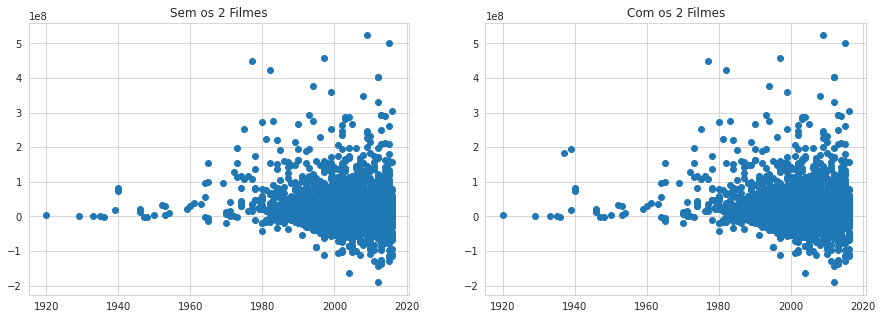

Os dois filmes são:
Gone with the Wind
Snow White and the Seven Dwarfs


In [ ]:
movies_war = [3970 , 4449]
#sns.scatterplot(data=imdb_usa.query('index not in @movies_war'), x='title_year', y='profit')
f, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].scatter(data=imdb_usa.query('index not in @movies_war'), x='title_year', y='profit')
axes[0].set_title('Sem os 2 Filmes')
axes[1].scatter(data=imdb_usa, x='title_year', y='profit')
axes[1].set_title('Com os 2 Filmes')
#imdb_usa.query("index == 3970").movie_title.values
plt.show()
print('Os dois filmes são:')
dois_filmes = imdb_usa.query('title_year <1940').sort_values(by='profit', ascending=False).head(2).movie_title.str[:-1].to_list()
for x in dois_filmes:
  print(x)

##Desafio 5 do Paulo Silveira

No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [ ]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


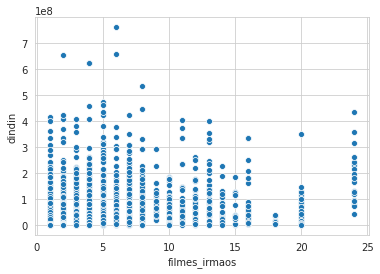

In [ ]:
sns.scatterplot(data=gross_director, x='filmes_irmaos', y='dindin')

In [ ]:
gross_director.query('filmes_irmaos==18').sort_values(by='filmes_irmaos', ascending=False).head(10)

,director_name,dindin,filmes_irmaos
1549,Woody Allen,7496522.0,18.0
1748,Woody Allen,16684352.0,18.0
3218,Woody Allen,NaN,18.0
3216,Woody Allen,NaN,18.0
2955,Woody Allen,39200000.0,18.0
2381,Woody Allen,5032496.0,18.0
2205,Woody Allen,3247816.0,18.0
2200,Woody Allen,5306447.0,18.0
2183,Woody Allen,10763469.0,18.0
2094,Woody Allen,4839383.0,18.0


##Desafio 6 do Thiago Gonçalves

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

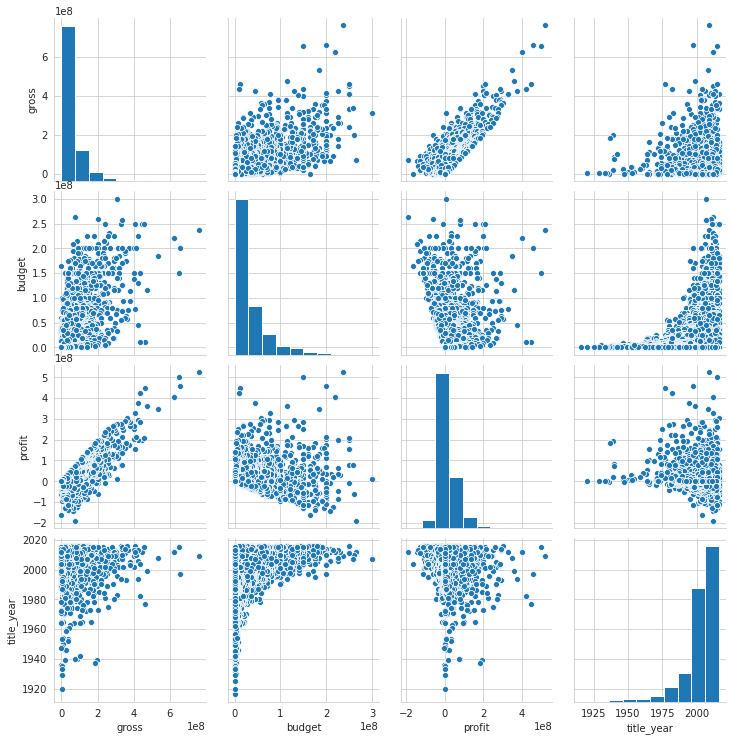

In [ ]:
sns.pairplot(data = imdb_usa[["gross", "budget", "profit","title_year"]])

In [ ]:
imdb_usa[["gross", "budget", "profit","title_year"]].corr()

,gross,budget,profit,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
profit,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


##Desafio 7 do Thiago Gonçalves

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.


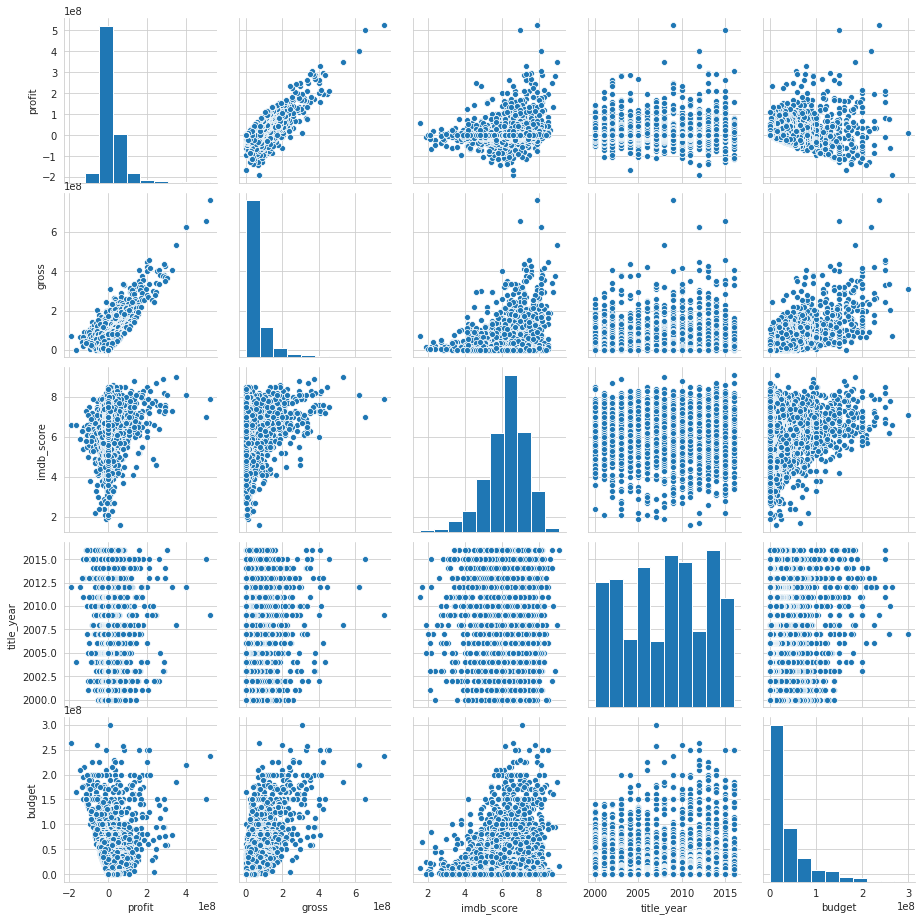

In [ ]:
imdb_usa_2000 = imdb_usa.query('title_year >= 2000')[['movie_title','profit',"gross", 'imdb_score',"title_year", "budget"]]
sns.pairplot(data=imdb_usa_2000)

In [ ]:
imdb_usa_2000.corr()

,profit,gross,imdb_score,title_year,budget
profit,1.000000,0.774906,0.244602,0.034094,0.102324
gross,0.774906,1.000000,0.249787,0.108058,0.708050
imdb_score,0.244602,0.249787,1.000000,-0.012965,0.175331
title_year,0.034094,0.108058,-0.012965,1.000000,0.065052
budget,0.102324,0.708050,0.175331,0.065052,1.000000


##Desafio 8 do Allan Spadini

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

In [ ]:
from sklearn import linear_model
from matplotlib.pyplot import legend

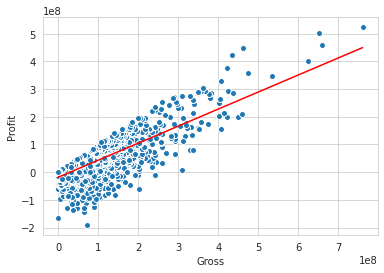

In [ ]:
imdb_usa_linear = imdb_usa.dropna().copy()
x = imdb_usa_linear[['gross']]
y = imdb_usa_linear[['profit']]

# create a linear regression model
regr = linear_model.LinearRegression()

# predict y from the data
train_x = np.asanyarray(x)
train_y = np.asanyarray(y)
regr.fit(train_x, train_y)

# plot the results
plt.scatter(x, y,edgecolors='white')
plt.plot(train_x, train_x * regr.coef_ + regr.intercept_, '-r')
plt.xlabel('Gross')
plt.ylabel('Profit')
plt.show()


In [ ]:
print('equação da reta: y = x *{:.2f} {:.2f}'.format(float(regr.coef_), float(regr.intercept_)))

equação da reta: y = x *0.62 -18428122.40


##Desafio 9 da Thais André

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [ ]:
generos_score = imdb_usa[['genres', 'imdb_score']].copy()
genres_split = generos_score['genres'].str.get_dummies('|')

In [ ]:
generos_score = genres_split.join(generos_score['imdb_score'])
generos_score

In [ ]:
corrmat = generos_score.corr()['imdb_score'][:-1]
corrmat.sort_values(ascending=False)


In [ ]:
print('Genero não tem correlaçao direta com nota')

In [ ]:
generos_profit = imdb_usa[['genres', 'profit']].copy()
genres_profit_split = generos_profit['genres'].str.get_dummies('|')
generos_profit = genres_profit_split.join(generos_profit['profit'])
generos_profit = generos_profit.dropna()

In [ ]:
generos_profit.corr()['profit'].dropna()

Começando denovo o desafio

In [ ]:
imdb_usa.corr().unstack().sort_values(ascending=False).drop_duplicates().head(15)

In [ ]:
nota_por_ano = imdb_usa_2000[['title_year', 'imdb_score']].copy()


In [ ]:
ax = sns.boxplot(data = nota_por_ano, x ="title_year", y="imdb_score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
#ano não interfere no imdb_score

In [ ]:
#filmes por ano usa
filmes_por_ano_usa = imdb_usa["title_year"].value_counts()
ano_nota_usa = imdb_usa[["title_year", "imdb_score"]].set_index("title_year").join(filmes_por_ano_usa, on="title_year")
ano_nota_usa.columns=["imdb_score", "qnt_filmes"]
ano_nota_usa = ano_nota_usa.reset_index().dropna()
ano_nota_usa.head()

In [ ]:
plt.scatter(data=ano_nota_usa, x='title_year', y='qnt_filmes')
plt.title('Quantidade de filmes por ano (USA)')
plt.show()

In [ ]:
#filmes por ano geral
filmes_por_ano = imdb["title_year"].value_counts()
ano_nota = imdb[["title_year", "imdb_score"]].set_index("title_year").join(filmes_por_ano, on="title_year")
ano_nota.columns=["imdb_score", "qnt_filmes"]
ano_nota = ano_nota.reset_index().dropna()
ano_nota.head()

In [ ]:
#filmes por ano sem USA
filmes_sem_usa = imdb.query("country != 'USA'")["title_year"].value_counts()
ano_nota_nousa = imdb[["title_year", "imdb_score"]].set_index("title_year").join(filmes_sem_usa, on="title_year")
ano_nota_nousa.columns=["imdb_score", "qnt_filmes"]
ano_nota_nousa = ano_nota_nousa.reset_index().dropna()
ano_nota_nousa.head()

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(data=ano_nota, x='title_year', y='qnt_filmes', label='Total')
plt.scatter(data=ano_nota_usa, x='title_year', y='qnt_filmes', c='orange', label='USA')
plt.scatter(data=ano_nota_nousa, x='title_year', y='qnt_filmes',c='green', label='Out USA')

plt.title('Quantidade de filmes Por Ano Mundial')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
qnt_filmes_pais = imdb.groupby('country').country.count().sort_values(ascending=False).head(10).index.to_list()
qnt_filmes_pais

In [ ]:
ax = sns.boxplot(data = imdb.query("country in @qnt_filmes_pais"), x ="country", y="imdb_score")
ax.set_title('Distribuição de score por pais (top10)', fontsize=20)
ax.set_xlabel('Países')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
profit_score = imdb_usa[['profit','imdb_score']].copy()
plt.scatter(data=profit_score, x='imdb_score', y='profit')
plt.show()

In [ ]:
profit_score.corr()

In [ ]:
imdb.columns

In [ ]:
facebook_score = imdb.query('movie_facebook_likes != 0')[['movie_facebook_likes', 'imdb_score']].copy()
facebook_score.corr()

In [ ]:
imdb_usa.query('movie_facebook_likes !=0')[['profit', 'movie_facebook_likes']].corr()

In [ ]:
imdb_usa[['gross', 'imdb_score']].corr()

#Dia 4

In [ ]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
df = pd.read_csv(uri)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [ ]:
#df.replace(to_replace ="Boston Celtics", value ="Omega Warrior") 
df_faltas = df.copy()
colunas = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
           'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 
           'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 
           'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
           'TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
           'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
           'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
           'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 
           'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO']

In [ ]:
df_faltas = df_faltas[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO']]
df_faltas.fillna(df_faltas.mean(),inplace=True)
df_faltas

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1.10,121.73,101.70,97.18,117.03,71.50,509.13
1,1.00,1.00,1.00,1.00,448.00,454.00,457.00,460.00,523.10,671.30,661.60,738.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00
2,1.00,1.00,1.00,1.00,447.00,451.00,455.00,459.00,409.20,531.70,389.00,438.10,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00
3,1.00,1.00,1.00,1.00,450.00,453.00,458.00,461.00,452.30,505.50,448.50,544.90,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00
4,0.00,0.00,0.00,0.00,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1.10,121.73,101.70,97.18,117.03,71.50,509.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,0.00,0.00,0.00,0.00,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1.10,121.73,101.70,97.18,117.03,71.50,509.13
137840,1.00,1.00,1.00,1.00,448.00,454.00,457.00,460.00,382.40,534.20,468.10,576.40,DACDBACDABDBDCACDBCAECECACDECDCDCEBDCCEBDBCAD,BAABCDBBAAEDBAADDBCBCDCBDDEDBCABBCABBCCBBAACB,ACEDC99999EEADCDEBBAEADEBADBBCDCBCCDADDCACACCB...,ACDEDBADBDACACECBBBDECABDADBCAEACABDCEBCEBCBD,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,120.00,60.00,60.00,120.00,20.00,380.00
137841,0.00,0.00,0.00,0.00,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1.10,121.73,101.70,97.18,117.03,71.50,509.13
137842,1.00,1.00,1.00,1.00,448.00,454.00,457.00,460.00,452.70,509.30,527.70,591.40,EEBCAECDEBADAECCAAADCCDCADDEDBEBBECBDEABADBDB,CECCCABAAEECCBBBBDEBCAECCCCBAAEEDACDBBCEBBEAB,EBCEB99999CDBCDABEBBDBEACBCCBCBDEBECACDBAAAAAA...,BCECBCEDCAADECEDBBDEEDEECDDCDBEBDDBDAABBDDEAB,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,80.00,40.00,40.00,100.00,40.00,300.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [ ]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = df[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [ ]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


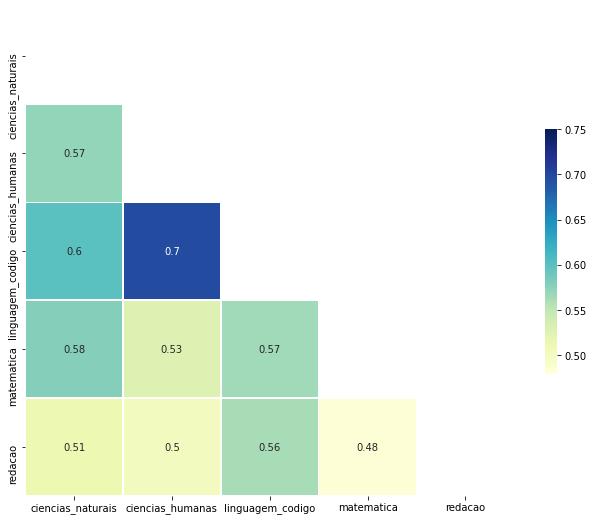

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin= 0.48, vmax= 0.75,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [ ]:
respostas_gabarito = df[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN',
           'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT','NU_NOTA_REDACAO']].dropna()

Ciencia natureza

In [ ]:
ciencia = respostas_gabarito[['TX_RESPOSTAS_CN', 'TX_GABARITO_CN']]
ciencia_respostas = ciencia['TX_RESPOSTAS_CN'].apply(lambda x: pd.Series(list(x)))
ciencia_gabarito = ciencia['TX_GABARITO_CN'].apply(lambda x: pd.Series(list(x)))

In [ ]:
ciencia_comp = pd.DataFrame(np.where(ciencia_respostas == ciencia_gabarito,1,0))

In [ ]:
ciencia_comp.columns = pd.RangeIndex(start=1, stop=46, step=1)

In [ ]:
#97270 total
ciencia_comp.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Matematica

In [ ]:
mat = respostas_gabarito[['TX_RESPOSTAS_MT', 'TX_GABARITO_MT']]
mat_respostas = mat['TX_RESPOSTAS_MT'].apply(lambda x: pd.Series(list(x)))
mat_gabarito = mat['TX_GABARITO_MT'].apply(lambda x: pd.Series(list(x)))
mat_comp = pd.DataFrame(np.where(mat_respostas == mat_gabarito,1,0))
mat_comp.columns = pd.RangeIndex(start=1, stop=46, step=1)

Linguagens

In [ ]:
linguagem = respostas_gabarito[['TX_RESPOSTAS_LC', 'TX_GABARITO_LC']]
linguagem_respostas = linguagem['TX_RESPOSTAS_LC'].apply(lambda x: pd.Series(list(x)))
linguagem_gabarito =linguagem['TX_GABARITO_LC'].apply(lambda x: pd.Series(list(x)))
linguagem_comp = pd.DataFrame(np.where(linguagem_respostas == linguagem_gabarito,1,0))
linguagem_comp.columns = pd.RangeIndex(start=1, stop=51, step=1)

CH

In [ ]:
humanas = respostas_gabarito[['TX_RESPOSTAS_CH', 'TX_GABARITO_CH']]
humanas_respostas = humanas['TX_RESPOSTAS_CH'].apply(lambda x: pd.Series(list(x)))
humanas_gabarito = humanas['TX_GABARITO_CH'].apply(lambda x: pd.Series(list(x)))
humanas_comp = pd.DataFrame(np.where(humanas_respostas == humanas_gabarito,1,0))
humanas_comp.columns = pd.RangeIndex(start=1, stop=46, step=1)

In [ ]:
df_qnt_acertos = pd.DataFrame()
df_qnt_acertos['humanas'] = humanas_comp.sum(axis=1)
df_qnt_acertos['linguagem'] = linguagem_comp.sum(axis=1)
df_qnt_acertos['matematica'] = mat_comp.sum(axis=1)
df_qnt_acertos['ciencia'] = ciencia_comp.sum(axis=1)
df_qnt_acertos['redacao'] = respostas_gabarito['NU_NOTA_REDACAO']

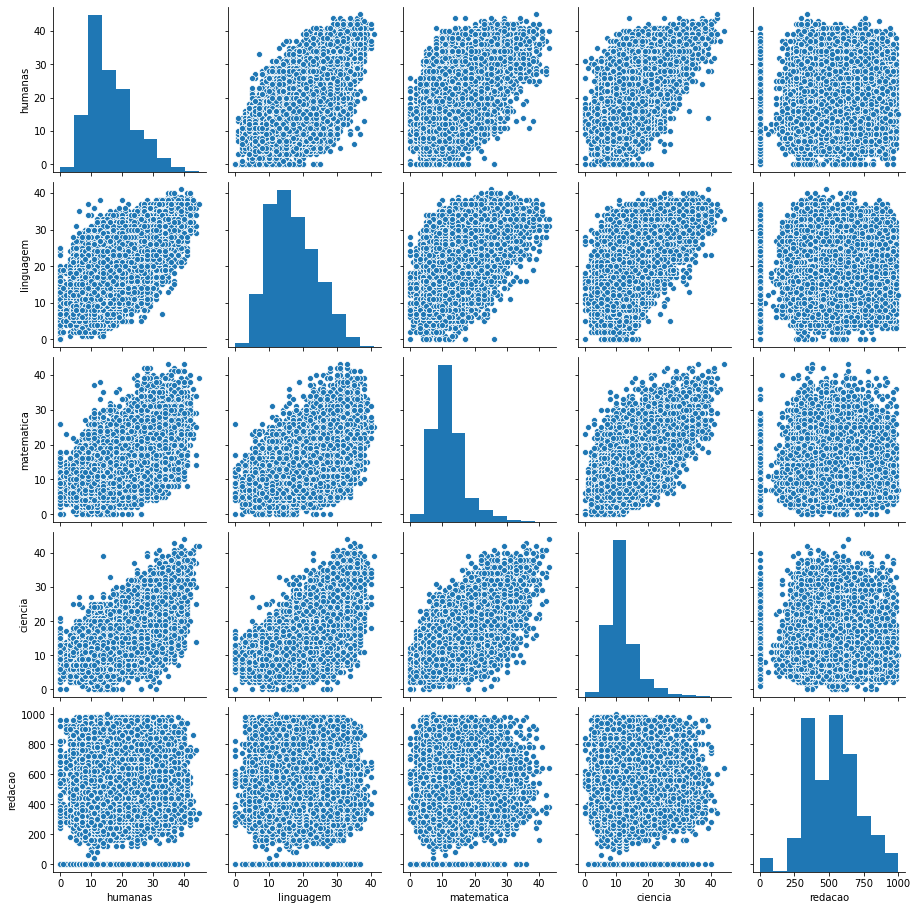

In [ ]:
sns.pairplot(data = df_qnt_acertos[["humanas", "linguagem", "matematica","ciencia","redacao"]])

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [ ]:
dados_desafio4 = dados_notas.replace(to_replace =0.00, value =np.NaN) 
dados_desafio4.dropna(inplace=True)
dados_desafio4

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

####não considerei o tipo da prova pra mudar a ordem das questões

In [ ]:
humanas_comp.sum().sort_values().head(10) / len(humanas_comp)*100
#porcentagem de pessoas que acertou cada questão

41   26.37
10   26.79
22   27.23
17   27.35
24   27.44
30   28.66
20   29.40
2    30.06
37   32.55
44   32.82
dtype: float64

In [ ]:
mat_comp.sum().sort_values().head(10) / len(mat_comp)*100
#porcentagem de pessoas que acertou cada questão

45   15.81
35   16.43
13   18.45
28   18.99
43   19.85
19   20.19
26   20.76
4    21.57
22   21.80
10   21.91
dtype: float64

In [ ]:
ciencia_comp.sum().sort_values().head(10) / len(ciencia_comp)*100
#porcentagem de pessoas que acertou cada questão

18   16.57
44   17.26
26   18.02
14   18.05
22   18.92
20   20.05
30   20.94
12   20.94
28   21.35
32   21.71
dtype: float64

In [ ]:
linguagem_comp.sum().sort_values().head(10) / len(linguagem_comp)*100
#porcentagem de pessoas que acertou cada questão

4    20.69
3    20.70
10   20.74
19   20.80
9    21.49
7    21.82
8    22.35
6    22.56
20   25.96
34   26.66
dtype: float64

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

#Dia 5

##outro notebook

https://colab.research.google.com/drive/1Z8xrLuJnnbwuZflF_2e9F2-SG3g2lbng